In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [ ]:
data = {
    'CustomerID' : list(range(1,21)),
    'Gender': ['Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female', 'Male', 'Female', 'Male',
               'Female', 'Female', 'Female', 'Male', 'Male', 'Female', 'Male', 'Male', 'Female', 'Female'],
    'Age': [19,21,20,23,31,22,35,23,64,30,67,35,58,24,37,22,35,20,52,28],
    'Annual Income (k$)': [15,15,16,16,17,17,18,18,19,19,19,20,20,20,20,21,21,23,23,24],
    'Spending Score (1-100)': [39,81,6,77,40,76,6,94,3,72,14,99,15,77,13,79,35,66,29,73]
}

df = pd.DataFrame(data)
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values



In [ ]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values



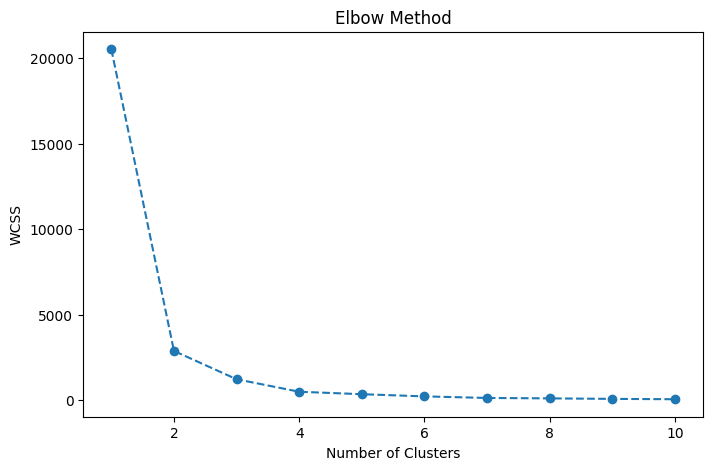

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)


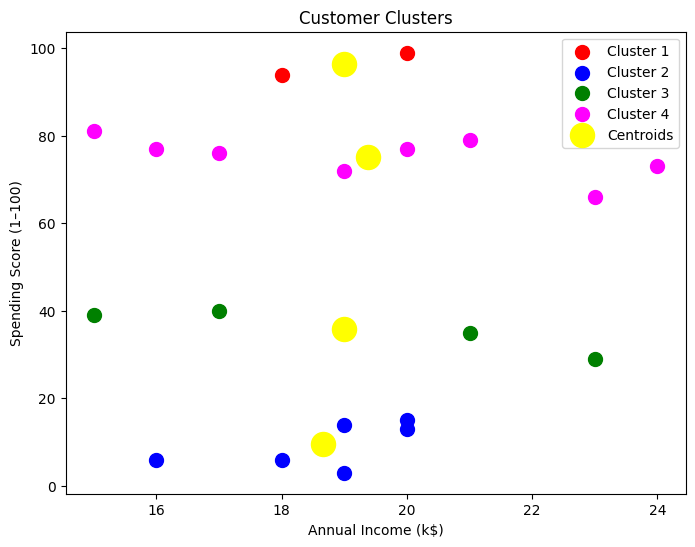

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='magenta', label='Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', label='Centroids')
plt.title('Customer Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')
plt.legend()
plt.show()


In [ ]:
cluster_summary = pd.DataFrame({
    'Cluster': [0, 1, 2, 3],
    'Description': [
        'Low income, low spenders',
        'High income, high spenders',
        'Moderate income, average spenders',
        'Low income, high spenders'
    ]
})
cluster_summary


,Cluster,Description
0,0,"Low income, low spenders"
1,1,"High income, high spenders"
2,2,"Moderate income, average spenders"
3,3,"Low income, high spenders"
